In [66]:
import torch
import requests
from accelerate.test_utils.testing import get_backend
from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, TableTransformerForObjectDetection

'''
LAB_11_005 - esse
LAB_12_047 - esse
LAB_11_010
LAB_10_083 - esse
LAB_09_179 - esse
LAB_09_048
LAB_08_020
LAB_07_134 - esse
LAB_07_078
LAB_06_098
LAB_05_036 - esse
LAB_04_012
LAB_03_119 - ESSE!
LAB_03_111
LAB_02_070

'''

path_img = "/home/aluno-pbarroso/pytorch-pbarroso/DATASET/ALL_IMG/LAB_06_098.jpg"
image = Image.open(path_img)
output_path = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/predict/LAB_06_098_4.jpg"

#model_path = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/model/checkpoint-1470"
model_path = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/model/CV_FASE3/trial_1_fold2/checkpoint-150"
#model_path = "microsoft/table-transformer-structure-recognition"

#device, _, _ = get_backend()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#CAMINHO DO MODELO CLASSICO TATR
processor_path = "microsoft/table-transformer-structure-recognition"

image_processor = AutoImageProcessor.from_pretrained(processor_path)
model = TableTransformerForObjectDetection.from_pretrained(model_path)

model = model.to(device)

with torch.no_grad():
    inputs = image_processor(images=[image], return_tensors="pt")
    outputs = model(**inputs.to(device))
    target_sizes = torch.tensor([[image.size[1], image.size[0]]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

# Criar uma cópia da imagem para desenhar as bounding boxes
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

rowMarked = False
columnMarked = False
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = model.config.id2label[label.item()]

    if "table column" or "table row" in label_name:

        draw.rectangle(box, outline="red", width=3)  # Desenha a caixa em vermelho
        draw.text((box[0], box[1]), f"{label_name} ({round(score.item(), 3)})", fill="red")
        
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

# Salvar ou exibir a imagem com as caixas desenhadas
image_with_boxes.save(output_path)
print(f"Imagem de saida salva em {output_path}")


Detected table row with confidence 0.511 at location [45.39, 126.9, 787.33, 294.56]
Detected table column with confidence 0.767 at location [400.59, 31.38, 787.85, 442.48]
Detected table column with confidence 0.961 at location [314.15, 33.1, 761.22, 442.52]
Detected table row with confidence 0.964 at location [46.51, 141.05, 785.99, 320.79]
Detected table column with confidence 0.986 at location [43.22, 35.52, 286.28, 443.12]
Detected table row with confidence 0.592 at location [43.99, 226.31, 776.58, 437.44]
Detected table row with confidence 0.638 at location [40.95, 328.02, 779.92, 444.6]
Detected table column with confidence 0.714 at location [512.16, 35.52, 782.32, 441.39]
Detected table column header with confidence 0.988 at location [48.32, 27.91, 783.84, 137.84]
Detected table row with confidence 0.577 at location [42.75, 276.86, 775.5, 441.8]
Detected table row with confidence 0.833 at location [43.2, 246.41, 777.97, 439.11]
Detected table with confidence 1.0 at location [39.

In [4]:

'''
LAB01_001.jpg
LAB01_074.jpg
LAB01_072.jpg
LAB_02_037.jpg
LAB_03_012.jpg
LAB_04_017.jpg
LAB_05_042.jpg
LAB_06_006.jpg
LAB_07_060.jpg
LAB_08_029.jpg
LAB_09_044.jpg
LAB_10_268.jpg
LAB_10_271.jpg
LAB_11_003.jpg
LAB_12_053.jpg
LAB_12_085.jpg

'''

'\nLAB01_001.jpg\nLAB01_074.jpg\nLAB01_072.jpg\nLAB_02_037.jpg\nLAB_03_012.jpg\nLAB_04_017.jpg\nLAB_05_042.jpg\nLAB_06_006.jpg\nLAB_07_060.jpg\nLAB_08_029.jpg\nLAB_09_044.jpg\nLAB_10_268.jpg\nLAB_10_271.jpg\nLAB_11_003.jpg\nLAB_12_053.jpg\nLAB_12_085.jpg\n\n'

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected table column with confidence 0.999 at location [810.0, 49.58, 961.24, 305.59]
Detected table row with confidence 1.0 at location [88.29, 207.67, 1369.83, 260.59]
Detected table spanning cell with confidence 0.683 at location [757.14, 49.53, 1367.21, 111.09]
Detected table column with confidence 0.954 at location [1180.96, 50.07, 1231.33, 304.74]
Detected table column with confidence 0.934 at location [952.04, 50.14, 1012.04, 304.76]
Detected table column with confidence 0.998 at location [1008.59, 49.71, 1178.68, 304.93]
Detected table row with confidence 0.999 at location [88.52, 111.51, 1369.24, 164.79]
Detected table column with confidence 1.0 at location [88.2, 49.93, 235.12, 304.91]
Detected table row with confidence 0.999 at location [88.22, 158.05, 1369.76, 209.62]
Detected table column with confidence 0.999 at location [593.78, 49.84, 738.0, 305.13]
Detected table column with confidence 1.0 at location [436.29, 49.74, 592.74, 304.97]
Detected table spanning cell with c

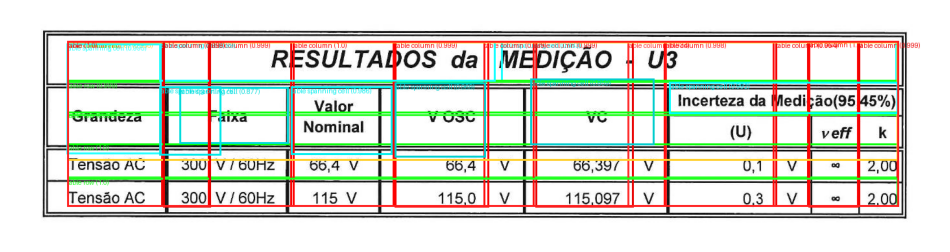

In [31]:

import torch
from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import random
import matplotlib.pyplot as plt
from peft import PeftModel

#======> INFERENCIA AUTOMATICA PARA UMA DETERMINADA IMAGEM

# LAB_09_024.jpg 
# LAB01_052.jpg
# Caminho da imagem e modelo

'''
LAB_11_005 - esse
LAB_12_047 - esse
LAB_11_010
LAB_10_083 - esse
LAB_09_179 - esse
LAB_09_048
LAB_08_020
LAB_07_134 - esse
LAB_07_078
LAB_06_098
LAB_05_036 - esse
LAB_04_012
LAB_03_119 - ESSE!
LAB_03_111
LAB_02_070

'''

base_path = "/home/aluno-pbarroso/pytorch-pbarroso/DATASET/ALL_IMG"
img_name = "LAB_10_083.jpg"

path_img = f"{base_path}/{img_name}"

#CAMINHO DO MODELO CLASSICO TATR
processor_path = "microsoft/table-transformer-structure-recognition"

#LISTA DE CHECKPOINTS PARA TESTAR
#model_path = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/model/LORA/100325P2/checkpoint-144"
model_path_cv_lora_best_checkpoint = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/model/LORA/050725P3/checkpoint-754"
model_path_cv_classic_ft_1 = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/model/CV_FASE3/trial_1_fold2/checkpoint-150"
model_path_cv_classic_ft_2 = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/model/LORA/070725P1/checkpoint-246"

#ALTERAR APENAS AQUI!!! (dois parametros)
model_path_ajusted = processor_path
model_isLora = False

# Configuração do dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carregar imagem e modelo
image = Image.open(path_img)
# Carregar processador de imagem
image_processor = AutoImageProcessor.from_pretrained(processor_path)

# Aplicar o LoRA no modelo base
if model_isLora:
    # Carregar modelo base com processador base
    base_model = TableTransformerForObjectDetection.from_pretrained(processor_path).to(device)
    #aplicando LoRA
    model = PeftModel.from_pretrained(base_model, model_path_ajusted).to(device)
else:
    # Carregar modelo base com modelo ajustado
    base_model = TableTransformerForObjectDetection.from_pretrained(model_path_ajusted).to(device)
    #transferir modelo para objeto model
    model = base_model

# Colocar em modo de avaliação para inferência
model.eval()

if True:
    # Inferência
    with torch.no_grad():
        inputs = image_processor(images=[image], return_tensors="pt")
        outputs = model(**inputs.to(device))
        
        target_sizes = torch.tensor([[image.size[1], image.size[0]]])
        results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

    # Paleta de cores base para cada classe
    base_colors = {
        "table": (255, 0, 0),  # Vermelho
        "table column": (255, 0, 0),  # Vermelho
        "table row": (0, 255, 0),  # Verde
        "table column header": (255, 165, 0),  # Laranja
        "table projected row header": (128, 0, 128),  # Roxo
        "table spanning cell": (0, 255, 255)  # Ciano
    }

    # Criar um dicionário para armazenar a variação de tom por classe
    color_variations = {key: [] for key in base_colors.keys()}

    # Criar imagem com bounding boxes
    image_with_boxes = image.copy()
    draw = ImageDraw.Draw(image_with_boxes)

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        #box = [103, 45, 1187, 366]
        label_name = model.config.id2label[label.item()]

        # Pegar a cor base da classe e modificar o tom para evitar repetição exata
        base_color = base_colors.get(label_name, (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
        
        # Criar variação de tom dentro da classe
        variation = random.randint(-50, 50)
        new_color = tuple(max(0, min(255, c + variation)) for c in base_color)

        # Garantir que não repita um tom exato
        while new_color in color_variations[label_name]:
            variation = random.randint(-50, 50)
            new_color = tuple(max(0, min(255, c + variation)) for c in base_color)

        # Registrar a variação de cor usada para essa classe
        color_variations[label_name].append(new_color)

        # Converter RGB para formato suportado pelo PIL (hexadecimal)
        hex_color = "#{:02x}{:02x}{:02x}".format(*new_color)

        #if "table" == label_name:
        draw.rectangle(box, outline=hex_color, width=3)  
        draw.text((box[0], box[1]), f"{label_name} ({round(score.item(), 3)})", fill=hex_color)

        print(f"Detected {label_name} with confidence {round(score.item(), 3)} at location {box}")

    # Exibir no estilo Google Colab
    plt.figure(figsize=(12, 12))
    plt.imshow(image_with_boxes)
    plt.axis("off")  # Remove os eixos
    plt.show()


In [2]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def draw_bboxes(image_path, bboxes):
    """
    Desenha bounding boxes na imagem com cores variadas.
    
    :param image_path: Caminho para a imagem
    :param bboxes: Lista de bounding boxes no formato [(x1, y1, x2, y2), ...]
    :return: Imagem com bounding boxes desenhadas
    """
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    
    for x1, y1, x2, y2 in bboxes:
        color = tuple(np.random.randint(0, 255, 3).tolist())  # Cor aleatória
        draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
    
    return image

# Exemplo de uso
#path_img = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TEAMCC/GT_IMG/CTM54_012_3.jpg"
path_img = "/home/aluno-pbarroso/pytorch-pbarroso/Certificados/In/LAB_01_CTM/012_3.png"


#48, 816, 1256, 1136
bboxes = [(108.0579833984375, 1238.4737548828125, 1201.556884765625, 1543.64990234375)]

img_with_bboxes = draw_bboxes(path_img, bboxes)

# Exibir no estilo Google Colab
plt.figure(figsize=(10, 10))
plt.imshow(img_with_bboxes)
plt.axis("off")  # Remove os eixos
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/aluno-pbarroso/pytorch-pbarroso/Certificados/In/LAB_01_CTM/012_3.png'

In [ ]:
#MOSTRAR DA FORMA ORIGINAL COMO CONSTA NO CODIGO

############ MODELO 1 - DETEÇÃO DE TABELA ------- ##############

#MODELO DE DETECCAO DE TABELA
model_path = "microsoft/table-transformer-detection"

#modelo para detectar as tabelas
model = AutoModelForObjectDetection.from_pretrained(model_path, revision="no_timm")
model.to(device)

detection_transform = transforms.Compose([
    MaxResize(800),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


############ MODELO 2 - ESTRUTURA DE TABELA ------- ##############

# Carregar processador de imagem
processor_path = "microsoft/table-transformer-structure-recognition"
image_processor = AutoImageProcessor.from_pretrained(processor_path)

#MODELO DETECCAO DE ESTRUTURA
#structure_model_path = "microsoft/table-structure-recognition-v1.1-all"
#FASE 2 - CHECKPOINT 282
structure_model_path = "/home/aluno-pbarroso/pytorch-pbarroso/FT_TATR_STRUCTURE/model/CV_FASE2/trial_9_fold1/checkpoint-24" 

# Carregar modelo base
base_model = TableTransformerForObjectDetection.from_pretrained(processor_path).to(device)

# Aplicar o LoRA no modelo base
structure_model = PeftModel.from_pretrained(base_model, structure_model_path).to(device)
print ("structure_model type = ", type(structure_model))

structure_transform = transforms.Compose([
    MaxResize(1000),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])